# Data Understanding and Preparation 

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import yfinance as yf

# loading data 
file_path = r"C:\Users\ethio\Desktop\Tenx.AIM2 -ET\Week1\Data\raw_analyst_ratings.csv"

df=pd.read_csv(file_path)
print(df.columns.tolist())
df.head()




['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


The unnamed column doesn't contribute any useful information beyond the row count. Before removing it, let's review 
the last few rows of the dataset.

In [110]:
print (df.tail(1))

         Unnamed: 0                                           headline  \
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url      publisher  \
1407327  https://www.benzinga.com/news/ipos/11/05/10789...  Allie Wickman   

                        date stock  
1407327  2011-05-12 00:00:00    ZX  


As observed, the unnamed column does not add value beyond indicating the number of rows and can therefore be considered redundant.

In [111]:

df = df.drop(columns=['Unnamed: 0'])
# Verify the DataFrame after dropping the column
print("\nUpdated column names in the dataset:")
print(df.columns.tolist())
print("\nFirst few rows of the updated dataset:")
df.head()


Updated column names in the dataset:
['headline', 'url', 'publisher', 'date', 'stock']

First few rows of the updated dataset:


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


# Data Cleaning 
Address missing values, identify and remove duplicates, and verify that all text is properly formatted (e.g., dates are in the correct format)
As it can be seen from the table the data column is in "%Y-%m-%d %H:%M:%S" format, and also converting the headlines to lowercase

In [112]:
# Check for missing values in the dataset
print("Missing values in each column:")
print(df.isnull().sum())
# Identify duplicate rows
print("Number of duplicate rows:")
print(df.duplicated().sum())
# Remove duplicate rows
df = df.drop_duplicates()
print("Remove duplicate rows:")
print(df.duplicated().sum())
date_format = "%Y-%m-%d %H:%M:%S"  
df['date'] = pd.to_datetime(df['date'], format=date_format, errors='coerce')
# Convert all headlines to lowercase to ensure consistency, as variations in case (e.g., "U" vs. "u") can affect text analysis.

df['headline'] = df['headline'].str.lower()
date_format = "%Y-%m-%d %H:%M:%S"

Missing values in each column:
headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64
Number of duplicate rows:
1
Remove duplicate rows:
0


# Descriptive Statistics
 After data cleansing, better to perform descriptive statistics, such as analyzing headline lengths. 
 Then count the number of articles per publisher to identify the most active ones and examine
 publication dates to identify trends over time


In [113]:
df['headline_length'] = df['headline'].str.len()

# descriptive statistics for headline lengths
headline_length_D_stats = df['headline_length'].describe()
print("Descriptive statistics for headline lengths:")
print(headline_length_D_stats)

Descriptive statistics for headline lengths:
count    1.407327e+06
mean     7.312054e+01
std      4.073532e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [114]:
# Count the number of articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\nNumber of articles per publisher:")
print(publisher_counts)


Number of articles per publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186978
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


In [115]:
# Count articles per day
df['date'] = pd.to_datetime(df['date'])
daily_counts = df['date'].dt.date.value_counts().sort_index()
print("\nDaily publication counts:")
print(daily_counts)

# Get the minimum and maximum dates
min_date = df['date'].min()
max_date = df['date'].max()

print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")


Daily publication counts:
date
2009-02-14      1
2009-04-27      2
2009-04-29      1
2009-05-22      1
2009-05-27      6
             ... 
2020-05-30     14
2020-05-31     17
2020-06-01    205
2020-06-02    183
2020-06-03     69
Name: count, Length: 3946, dtype: int64
Minimum Date: 2009-02-14 00:00:00
Maximum Date: 2020-06-03 00:00:00



To analyze trends over time in publication dates, including increased news frequency on specific days or during particular events, we should plot the number of publications per day from 1900 to 2020. The data from 1900 to 2008 shows a general downtrend, with significant changes starting from 2008. By focusing on these timeframes, we can observe and understand the overall trends more effectively. Additionally, marking major events in the plots will help highlight significant changes in publication frequency

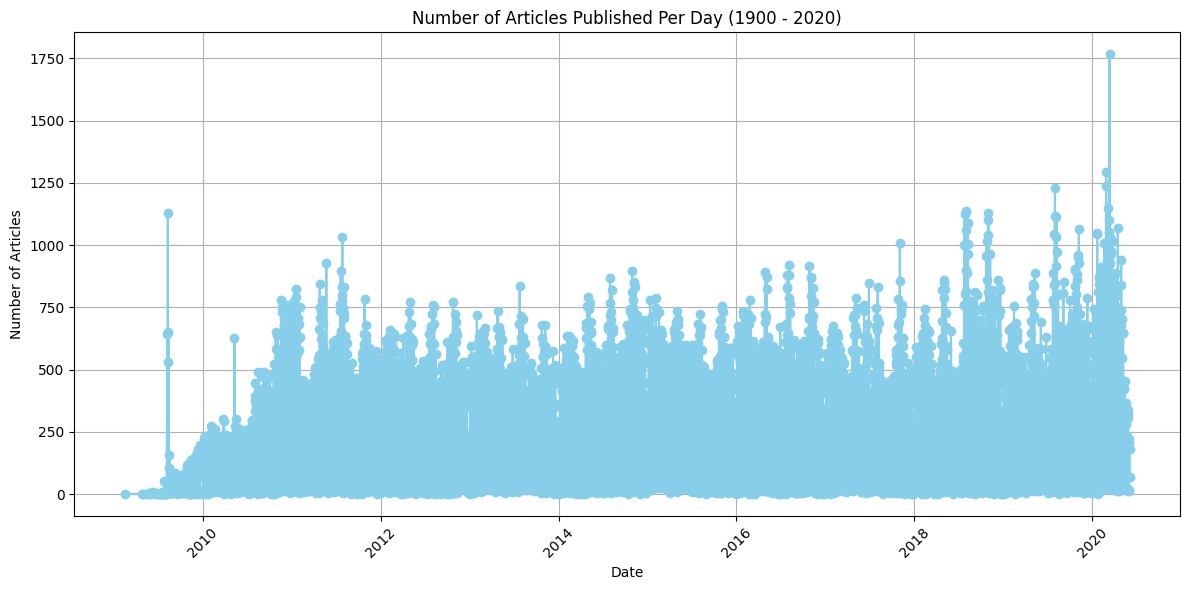

In [126]:
# Filter dates between 1900 and 2020
df = df[(df['date'] >= '1900-01-01') & (df['date'] <= '2020-12-31')]

# Extract date components
df['date_only'] = df['date'].dt.date

# Count the number of articles published per day
articles_per_day = df.groupby('date_only').size()

# Define major events (example dates)
major_events = {
    '2008 Financial Crisis': pd.Timestamp('2008-09-01'),
    'COVID-19 Pandemic': pd.Timestamp('2020-03-01'),
    'Dot-com Bubble Burst': pd.Timestamp('2000-03-01')
}

# Plot the number of articles published per day
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.plot(articles_per_day.index, articles_per_day.values, marker='o', color='skyblue')
plt.title('Number of Articles Published Per Day (1900 - 2020)')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)

# Add vertical lines for major events
for event, date in major_events.items():
    if date in articles_per_day.index:
        plt.axvline(date, color='red', linestyle='--', alpha=0.7, label=event)

# Add a legend for major events

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Before 2009, the number of articles published was relatively low, likely due to the limitations of digital news platforms at the time. However, around 2008-2009, there is a noticeable increase that aligns with the 2008 financial crisis, which led to intense media coverage. Following that period, there is a consistent rise in the number of articles, with a significant spike observed at the onset of the COVID-19 pandemic, as the world grappled with the health crisis.